In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#importing Dataset

df = pd.read_csv("churn_prediction.csv")

In [3]:
#Looking at top five lines from our dataset

df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
#Rows and columns of Dataset

df.shape

(28382, 21)

In [5]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [6]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [7]:
df.isna().sum().sum()

7094

In [8]:
df.churn.value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [9]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# Univariate Analysis for Continuos variables

In [10]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


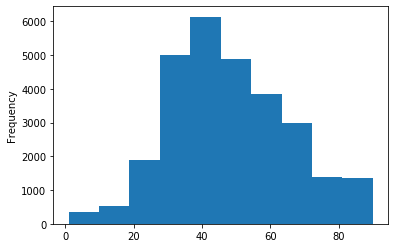

In [11]:
#plotting a histogram for age variable

df['age'].plot.hist()

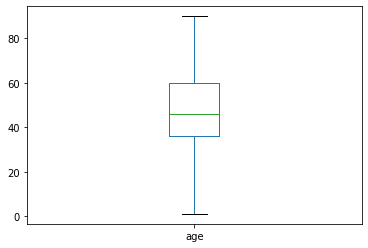

In [12]:
#plotting a box plot for age variable

df['age'].plot.box()

# Univariate Analysis For Categorical Variable

In [13]:
#Creating a frequency table for categorical variable gender

df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [14]:
#Creating percentages for frequencies

df['gender'].value_counts()/len(df['gender'])

Male      0.583046
Female    0.398457
Name: gender, dtype: float64

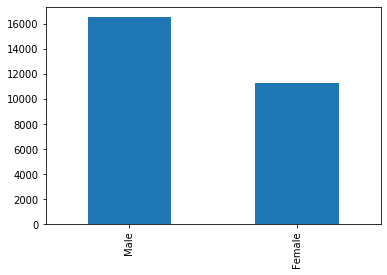

In [15]:
#Creating bar plot gender frequencies

df['gender'].value_counts().plot.bar()

# Continuous - Continuous Bivariate analysis

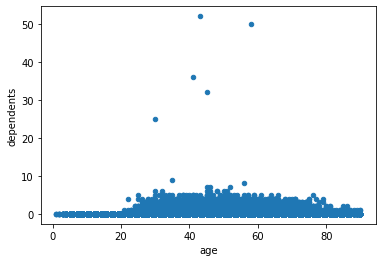

In [16]:
#To check the corelation between two variables

df.plot.scatter('age','dependents')

In [17]:
df.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [18]:
continuous_var = ['dependents','previous_month_debit','age','current_balance']

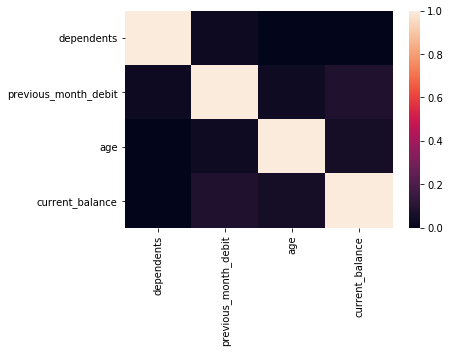

In [19]:
corr = df[continuous_var].corr()
sns.heatmap(corr)

# Continuous - Categorical Bivariate analysis

In [20]:
#if mean age of x is statistically diff from mean age of female

from scipy.stats import ttest_ind

In [21]:
occupation1 = df[df['occupation'] == 'self_employed']
occupation2 = df[df['occupation'] == 'salaried']

In [22]:
ttest_ind(occupation1['churn'],occupation2['churn'],nan_policy = 'omit')

Ttest_indResult(statistic=4.837189984562174, pvalue=1.3249771061386447e-06)

# Categorical_Categorical

In [23]:
pd.crosstab(df['gender'],df['churn'])

churn,0,1
gender,,
Female,9324,1985
Male,13379,3169


In [24]:
df[['gender','churn']].groupby(['gender']).mean()

,churn
gender,
Female,0.175524
Male,0.191504


In [25]:
df[['occupation','churn']].groupby(['occupation']).mean()

,churn
occupation,
company,0.100000
retired,0.150692
salaried,0.171092
self_employed,0.198386
student,0.157434


In [26]:
df[['dependents','churn']].groupby(['dependents']).mean()

,churn
dependents,
0.0,0.174248
1.0,0.228674
2.0,0.225581
3.0,0.213980
4.0,0.184358
5.0,0.121951
6.0,0.500000
7.0,0.000000
8.0,1.000000


In [27]:
df[['city','churn']].groupby(['city']).mean()

,churn
city,
0.0,0.250000
1.0,0.000000
2.0,0.333333
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.000000
7.0,0.090909
8.0,0.000000


In [28]:
df[['days_since_last_transaction','churn']].groupby(['days_since_last_transaction']).mean()

,churn
days_since_last_transaction,
0.0,0.171053
1.0,0.151515
2.0,0.175676
3.0,0.222623
4.0,0.204114
5.0,0.203125
6.0,0.177852
7.0,0.240642
8.0,0.204082


In [29]:
from scipy.stats import chi2_contingency

In [30]:
chi2_contingency(pd.crosstab(df['gender'],df['churn']))

(11.270738823296812,
 0.0007873838498074115,
 1,
 array([[ 9216.65028539,  2092.34971461],
        [13486.34971461,  3061.65028539]]))


# Identifying and Treating Missing Values

In [31]:
df.dropna(how='all').shape

(28382, 21)

# Treating the missing values

In [32]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [33]:
df['dependents'] = df['dependents'].fillna('0.0')

In [34]:

df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [35]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [36]:
df['occupation'] = df['occupation'].fillna('self_employed')

In [37]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [38]:
df['city'].mean()

796.1095761267632

In [39]:
df['city'] = df['city'].fillna('1020.0')

In [40]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna('0.0')

In [41]:
#for converting gender 

df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [42]:
#So there is a good mix of males and females and arguably missing values cannot be filled with any one of them. 
#We could create a seperate category by assigning the value -1 for all missing values in this column.
dict_gender = {'Male':1,'Female':0}
df.replace({'gender':dict_gender},inplace = True)
df['gender'] = df['gender'].fillna(-1)

In [43]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [44]:
df.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                3
dependents                           16
occupation                            5
city                               1605
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         361
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

In [45]:
#Dropping customer_id from the dataset

df = df.drop(["customer_id"], axis = 1)

In [46]:
df.shape 

(28382, 20)

In [47]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1.0,0,self_employed,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,1.0,0,self_employed,1020.0,2,3214,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,1.0,0,salaried,146,2,41,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,-1.0,0.0,self_employed,1020,2,582,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,1.0,2,self_employed,1494,3,388,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## Shuffling and creating train and test data set

In [48]:
from sklearn.utils import shuffle

In [49]:
#Shufffling the dataset

df = shuffle(df,random_state=42)

In [50]:
#Creating 4 divisions

div = int(df.shape[0]/5)

In [51]:
div

5676

In [52]:
# 3 parts to train set and 1 part to test set

train = df.loc[ :4*div+1 , :]
test =  df.loc[4*div+1: ]


In [53]:
train.shape , test.shape


((17833, 20), (10550, 20))

In [54]:
train.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
27546,4224,53,0.0,3,self_employed,146,2,2841,118,103.56,1674.99,1833.00,2738.50,0.44,0.44,1429.01,5000.44,236.57,1315.54,0
16516,718,30,0.0,0.0,salaried,334,2,750,0.0,76.97,76.97,1531.19,2547.20,0.70,0.70,0.70,2757.84,76.97,1962.68,1
11680,2803,32,0.0,0,salaried,980,2,655,17,1471.60,1912.21,1754.23,444.05,34.51,60.27,485.38,718.38,1718.09,2139.74,1
20270,2113,67,1.0,0,retired,666,2,715,20,3008.04,3014.99,2925.30,5136.41,36.29,214.43,43.24,294.29,3029.92,3071.65,0
9185,1434,45,1.0,0,self_employed,1096,2,933,7,6217.26,6903.60,8392.78,9228.10,114.87,4538.01,789.16,8898.01,6225.23,9362.04,0


In [55]:
test.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
22705,2244,59,1.0,2,salaried,623,3,1627,12,7145.79,9573.46,8618.39,6243.89,3870.96,0.10,6559.15,497.39,8987.19,9620.99,0
23250,5777,64,1.0,3,salaried,856,1,71,9,11094.84,11104.99,9694.16,3191.98,276.07,2923.61,286.21,2060.14,10905.14,11033.51,0
23454,2453,47,0.0,0,self_employed,1020,2,540,12,1779.45,3583.03,4457.05,8445.59,4286.31,12857.74,6089.90,12123.87,3333.83,5524.50,0
23656,5161,35,1.0,0,self_employed,61,2,263,186,13678.78,13673.58,13645.47,13586.93,0.44,0.44,0.44,0.44,13676.54,13672.24,0
28067,1582,26,0.0,0,self_employed,649,2,644,0.0,12565.80,9891.26,9798.89,9097.10,0.09,0.09,0.09,0.09,10628.61,9449.06,0


# Prediction using Simple mode

In [56]:
test['simple_mode'] = train['churn'].mode()[0]

C:\Users\Dushrath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
test['simple_mode'].head()

22705    0
23250    0
23454    0
23656    0
28067    0
Name: simple_mode, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
#Accuracy Score of Simple mode method

simple_mode_accuracy = accuracy_score(test['churn'],test['simple_mode'])
simple_mode_accuracy

0.80739336492891

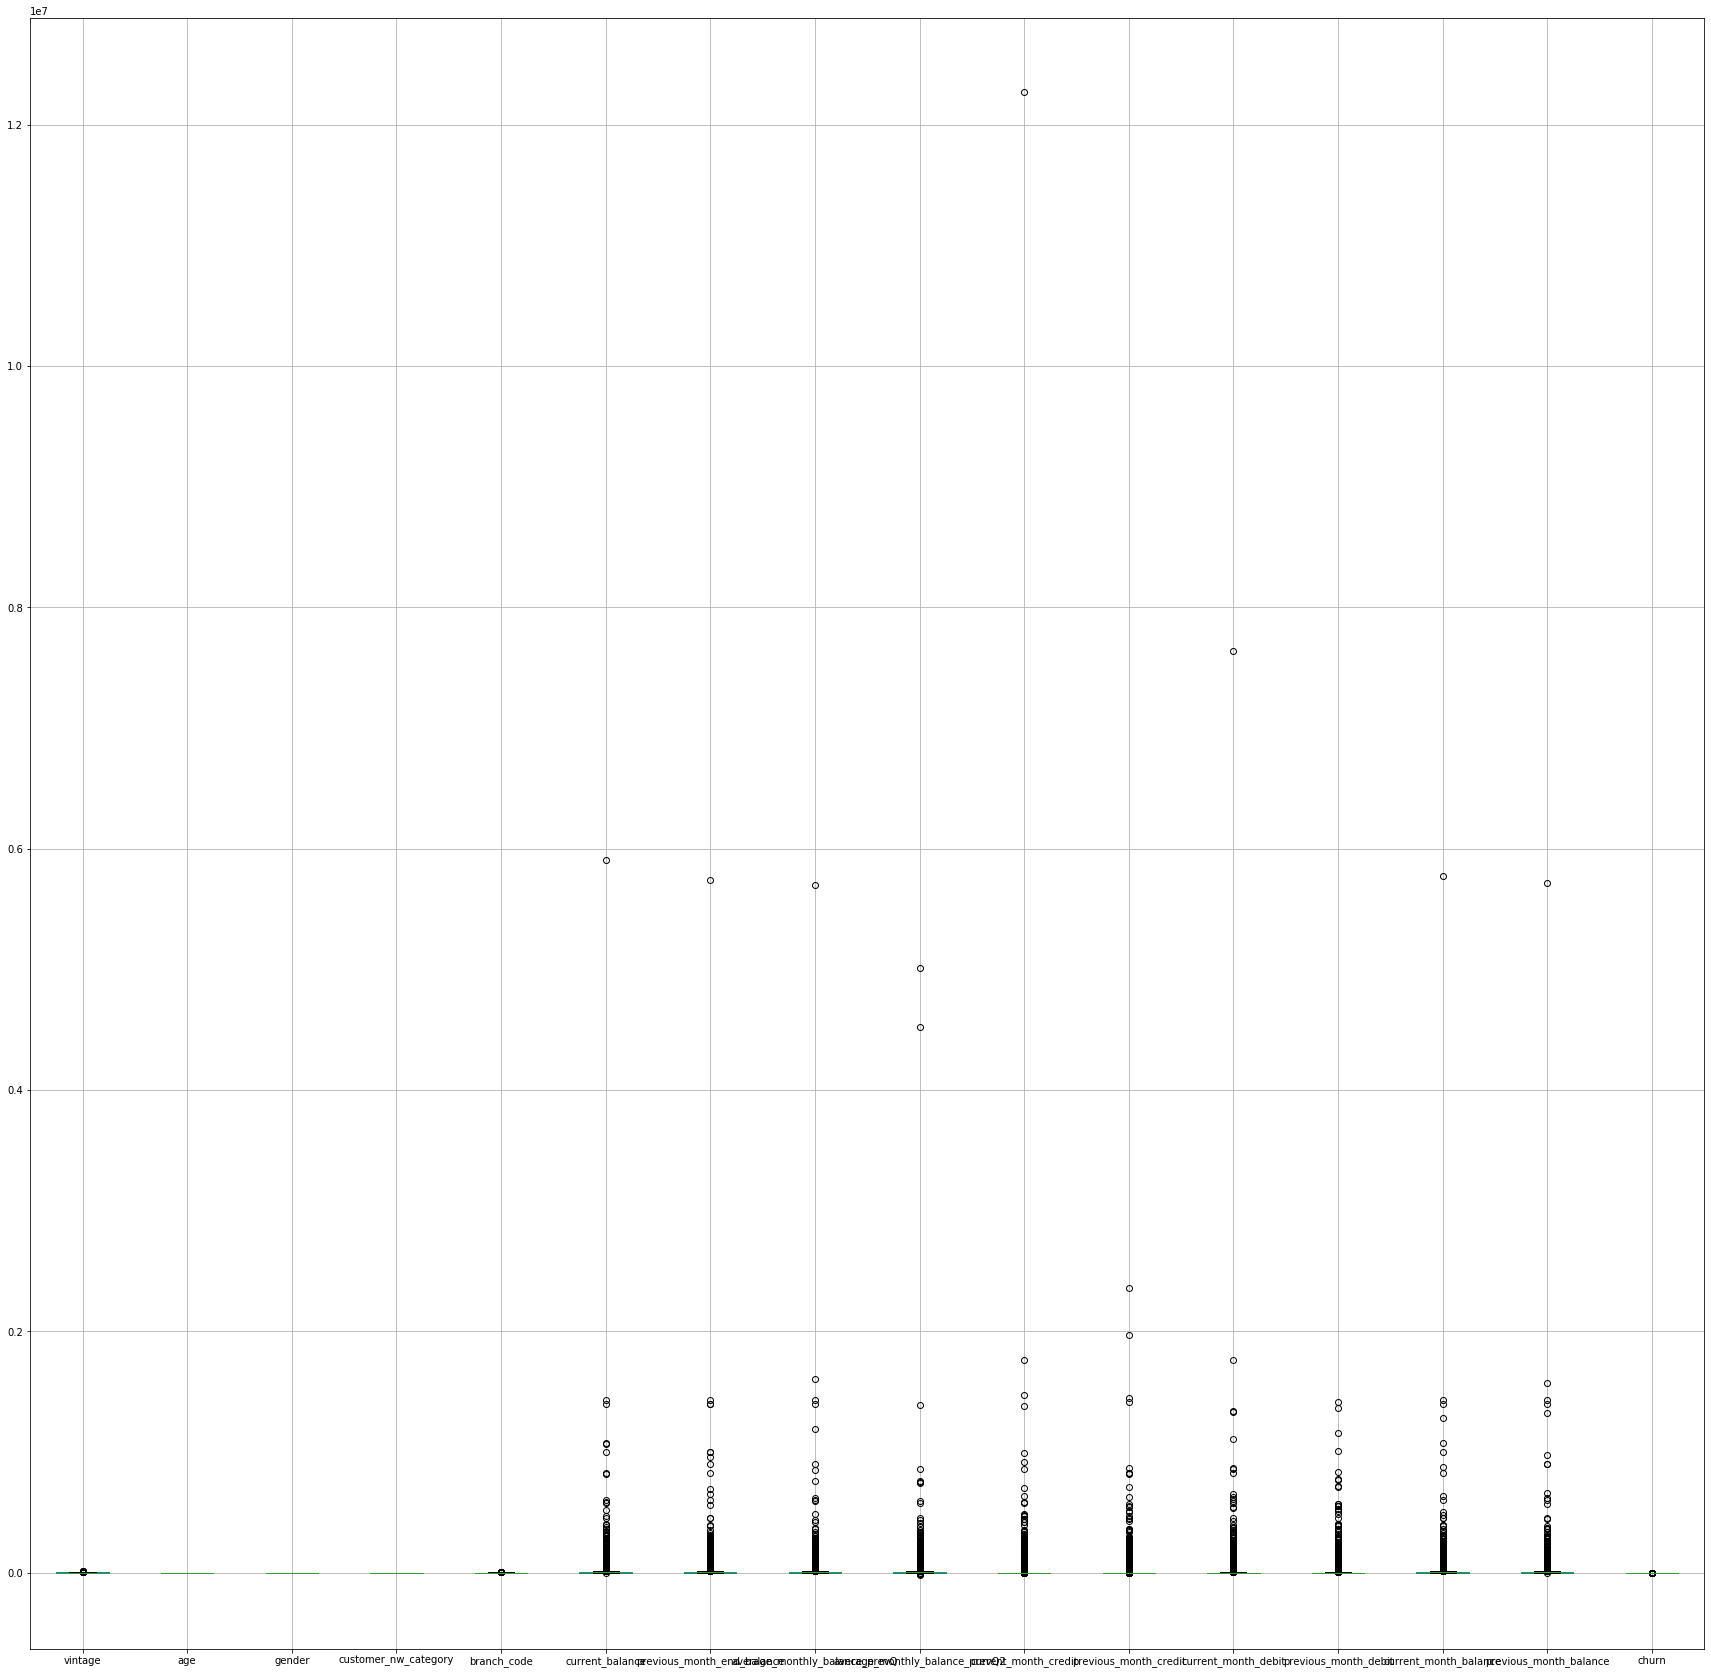

In [60]:
df.boxplot(figsize=(30,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB4EE4E2B0>,
      dtype=object)

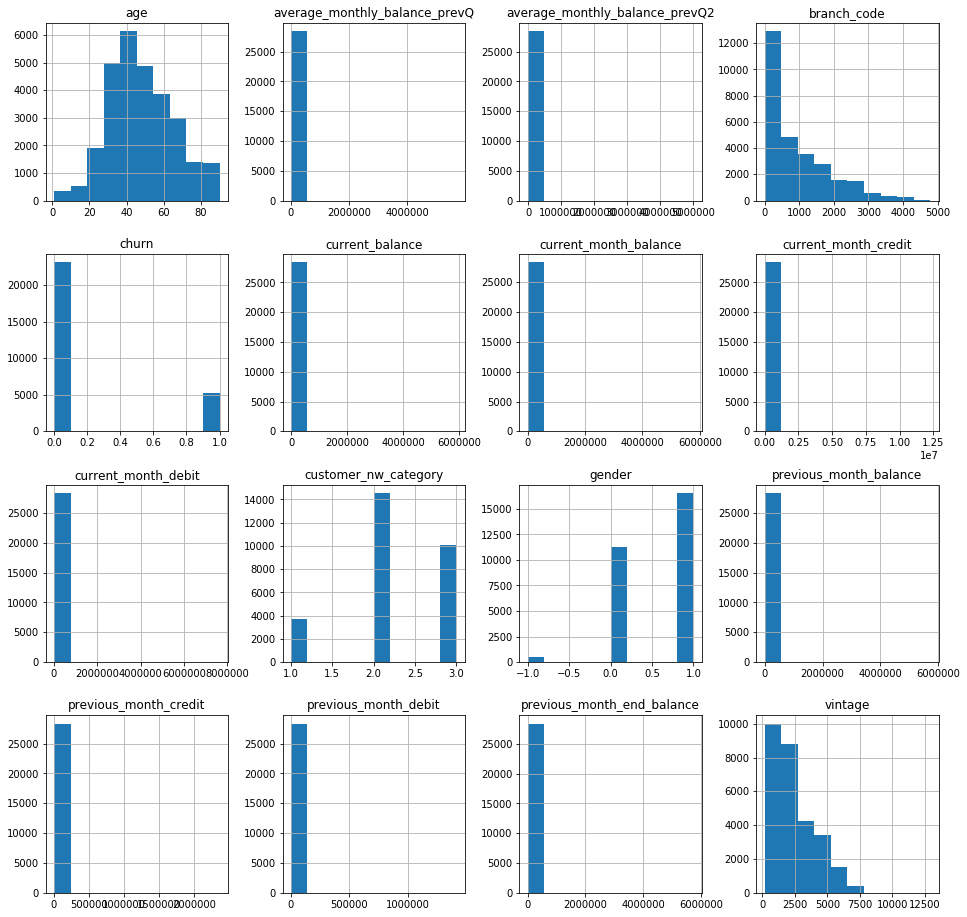

In [61]:
df.hist(figsize=(16,16))

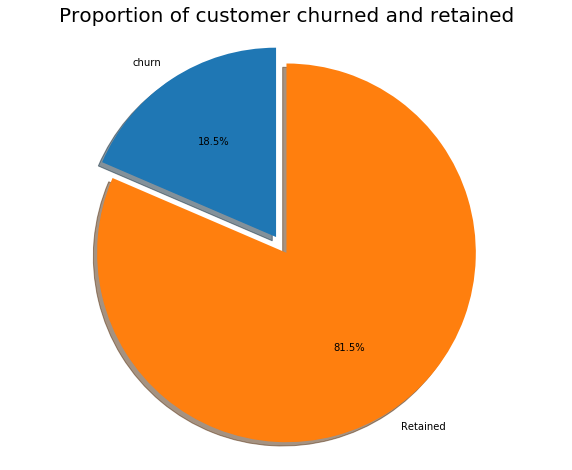

In [62]:
import matplotlib.pyplot as plt
from pylab import rcParams

labels = 'churn', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


# Removing the outliers from the data and scaling the values

In [63]:

from sklearn.preprocessing import StandardScaler
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    df[i] = np.log(df[i] + 15000)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

C:\Users\Dushrath\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [64]:
import seaborn as sns



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB51DFB208>,
      dtype=object)

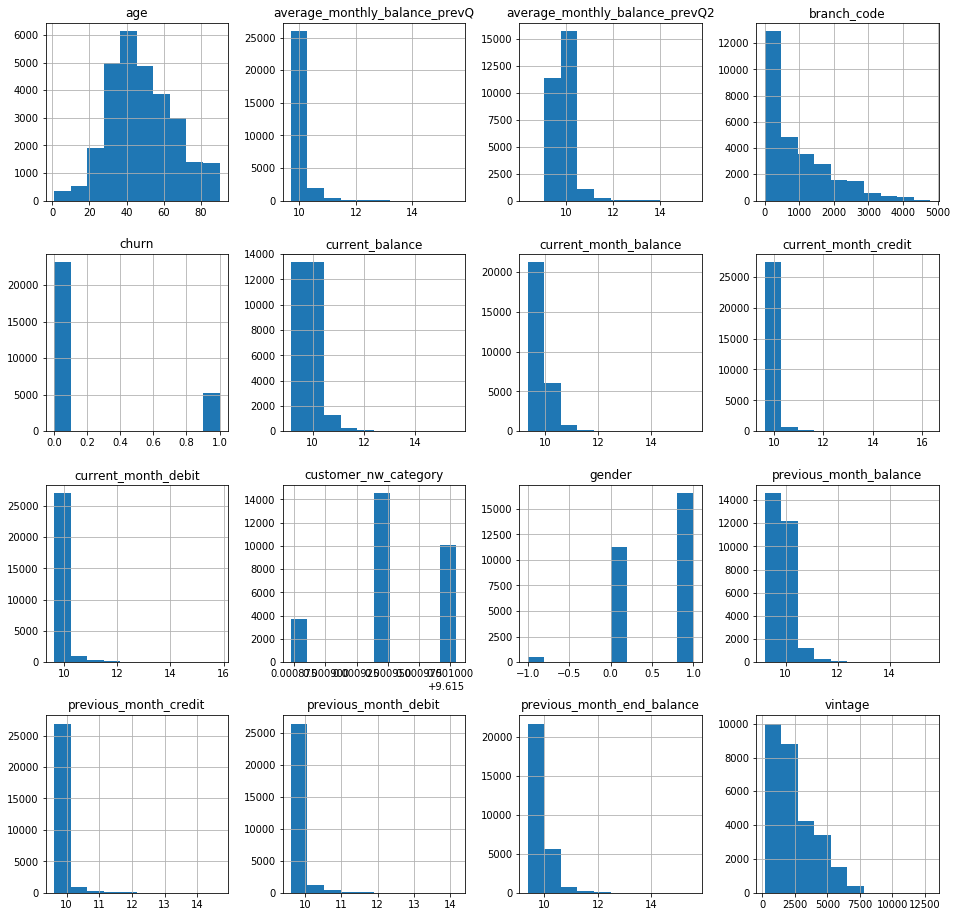

In [65]:
df.hist(figsize=(16,16))

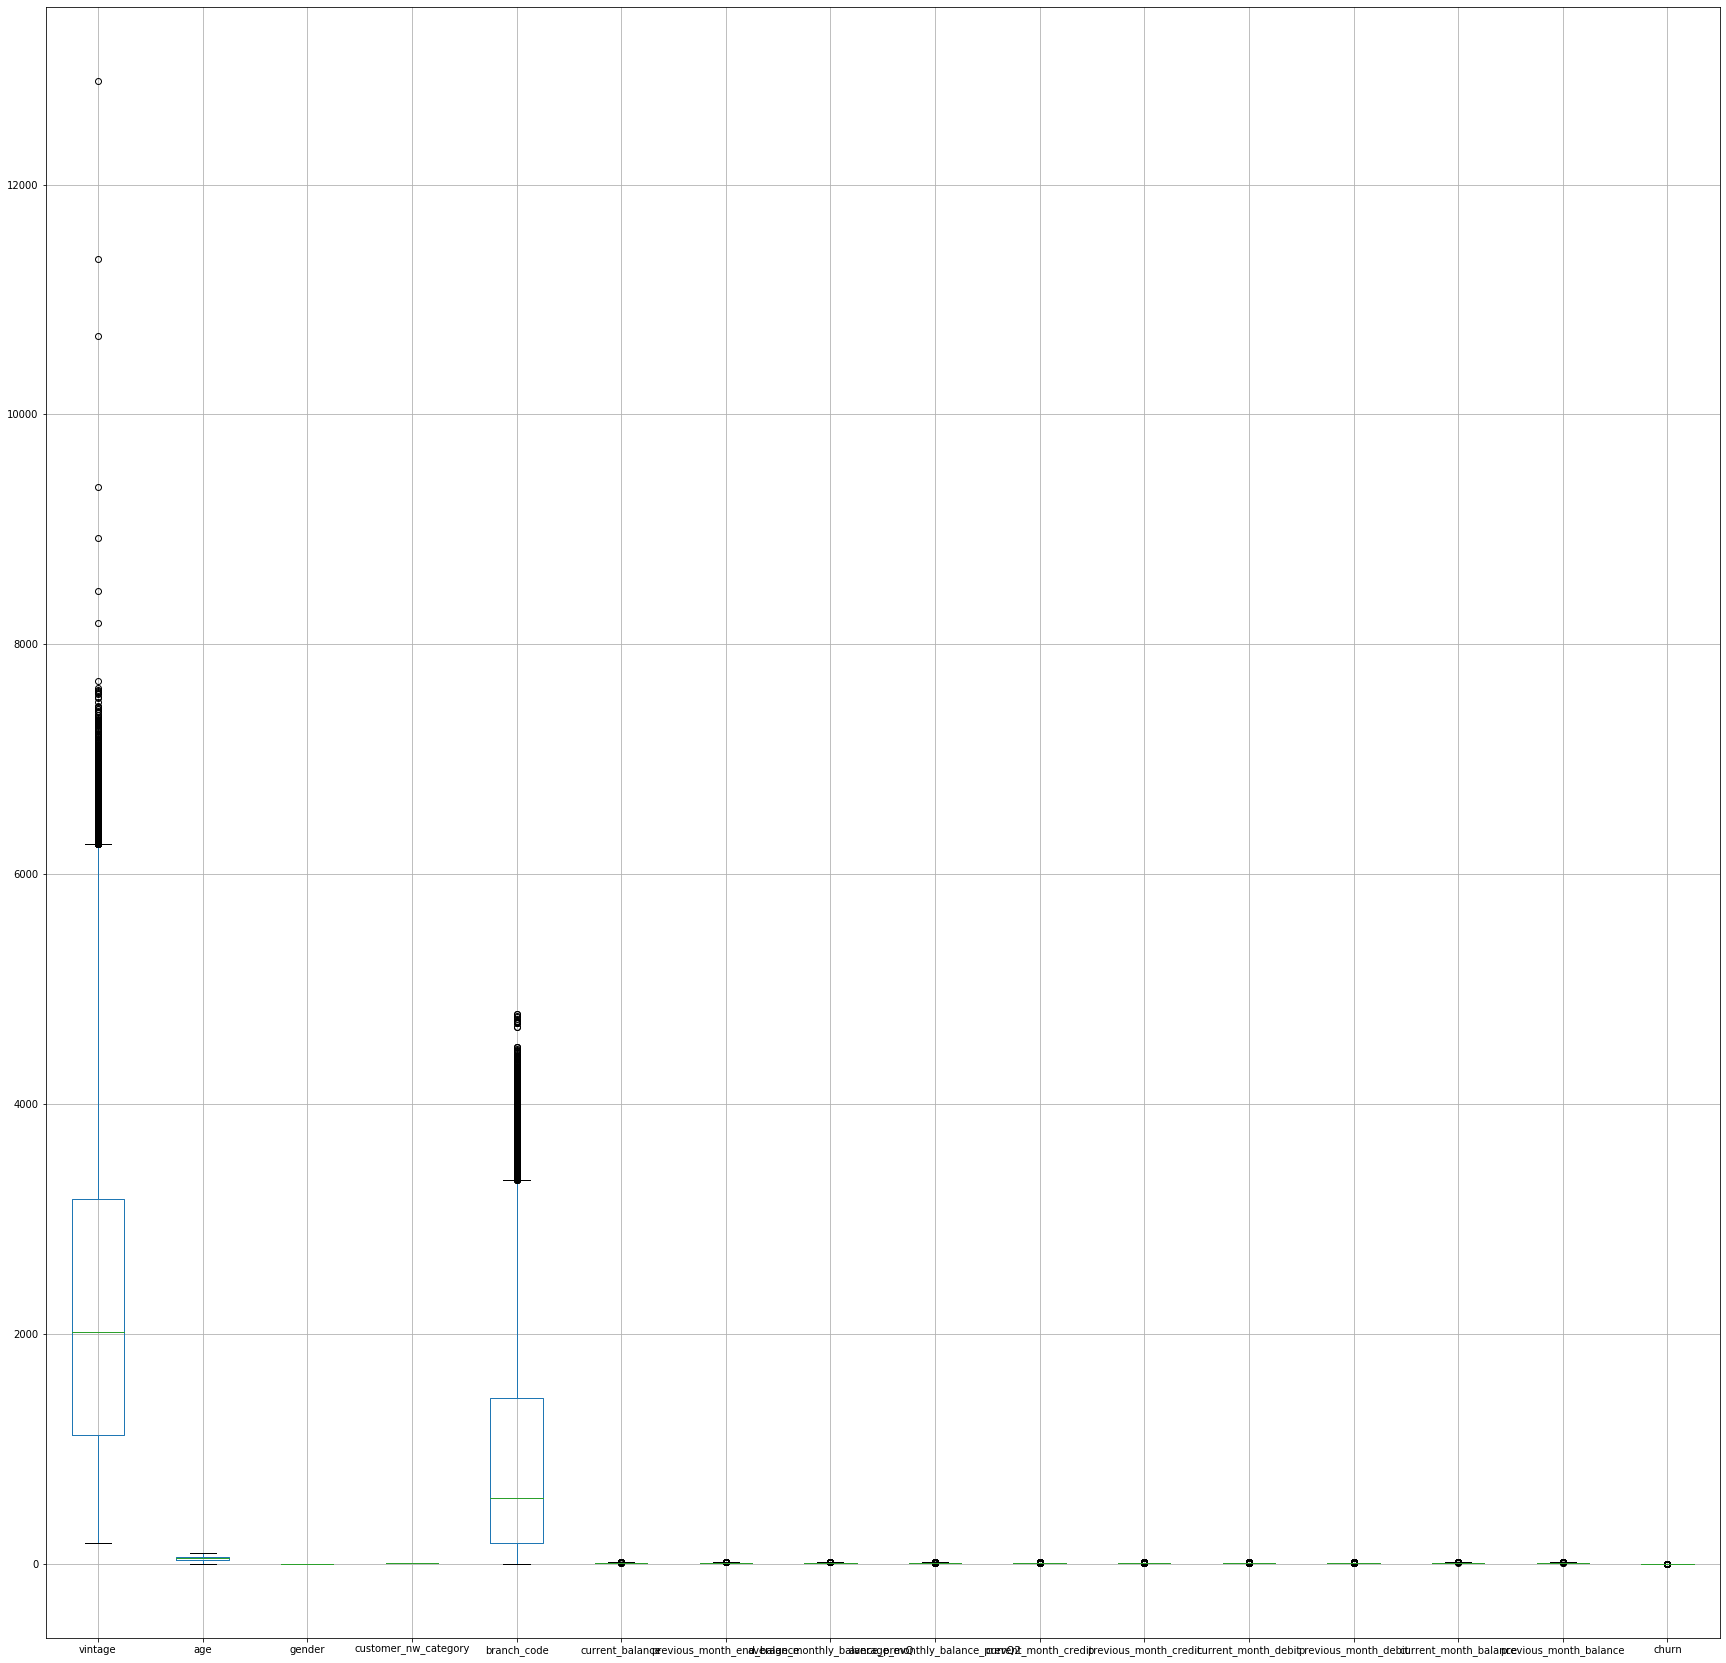

In [66]:
df.boxplot(figsize=(30,30))

In [67]:
df['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

# Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
df['occupation'] = df['occupation'].map({'self_employed':0,
                                         'salaried':1,
                                         'student':2,
                                          'retired':3,
                                          'company':4})

In [70]:
df['occupation'].value_counts()

0    17556
1     6704
2     2058
3     2024
4       40
Name: occupation, dtype: int64

In [71]:
df.head(20)

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
27546,4224,53,0.0,3,0,146,9.615939,2841,118,9.622686,9.721665,9.731097,9.783493,9.615835,9.615835,9.706804,9.903510,9.631454,9.699873,0
16516,718,30,0.0,0.0,1,334,9.615939,750,0.0,9.620924,9.620924,9.713004,9.772650,9.615852,9.615852,9.615852,9.784582,9.620924,9.738771,1
11680,2803,32,0.0,0,1,980,9.615939,655,17,9.709393,9.735791,9.726406,9.644979,9.618104,9.619815,9.647652,9.662586,9.724247,9.749155,1
20270,2113,67,1.0,0,3,666,9.615939,715,20,9.798574,9.798959,9.793968,9.910285,9.618222,9.630000,9.618684,9.635235,9.799788,9.802100,0
9185,1434,45,1.0,0,0,1096,9.615939,933,7,9.962570,9.994406,10.060183,10.095268,9.623434,9.880117,9.667079,10.081550,9.962946,10.100781,0
19437,2254,43,1.0,0,1,1111,9.615872,120,0.0,9.717042,9.720504,9.720951,9.724896,9.615843,9.615843,9.617983,9.616319,9.718967,9.720905,0
15344,1523,35,1.0,0,0,409,9.616005,1658,332,9.730550,9.730550,9.730550,9.729864,9.615846,9.615846,9.615846,9.615846,9.730550,9.730550,0
8665,2239,46,1.0,0,0,1437,9.615939,1063,228,9.747236,9.747236,9.747236,9.744138,9.615814,9.615814,9.615814,9.615814,9.747236,9.747236,0
2201,1889,55,1.0,2,0,409,9.615939,1376,18,9.682871,9.821780,10.791745,11.121425,9.739505,9.734469,9.615823,9.615823,9.835404,11.007170,1
25571,1425,55,1.0,0,0,1597,9.616005,737,73,9.800567,9.839389,9.811646,9.717469,9.615830,9.615830,9.615830,9.615830,9.823507,9.839389,0


In [72]:

df.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    1
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [73]:
df['average_monthly_balance_prevQ2'] = df['average_monthly_balance_prevQ2'].fillna('9.739545')

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df.iloc[:,0:19]  #independent columns
y = df.iloc[:,-1] 
model.fit(X,y)

C:\Users\Dushrath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [75]:
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers

[0.04807974 0.04399221 0.01960255 0.02124162 0.02180952 0.04331757
 0.02822376 0.04253042 0.04742769 0.11018649 0.06370201 0.05578929
 0.05536007 0.04399542 0.05042129 0.09661201 0.07089885 0.07593997
 0.06086953]


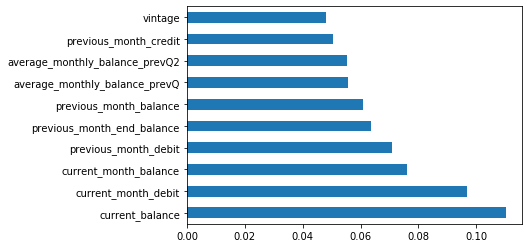

In [76]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

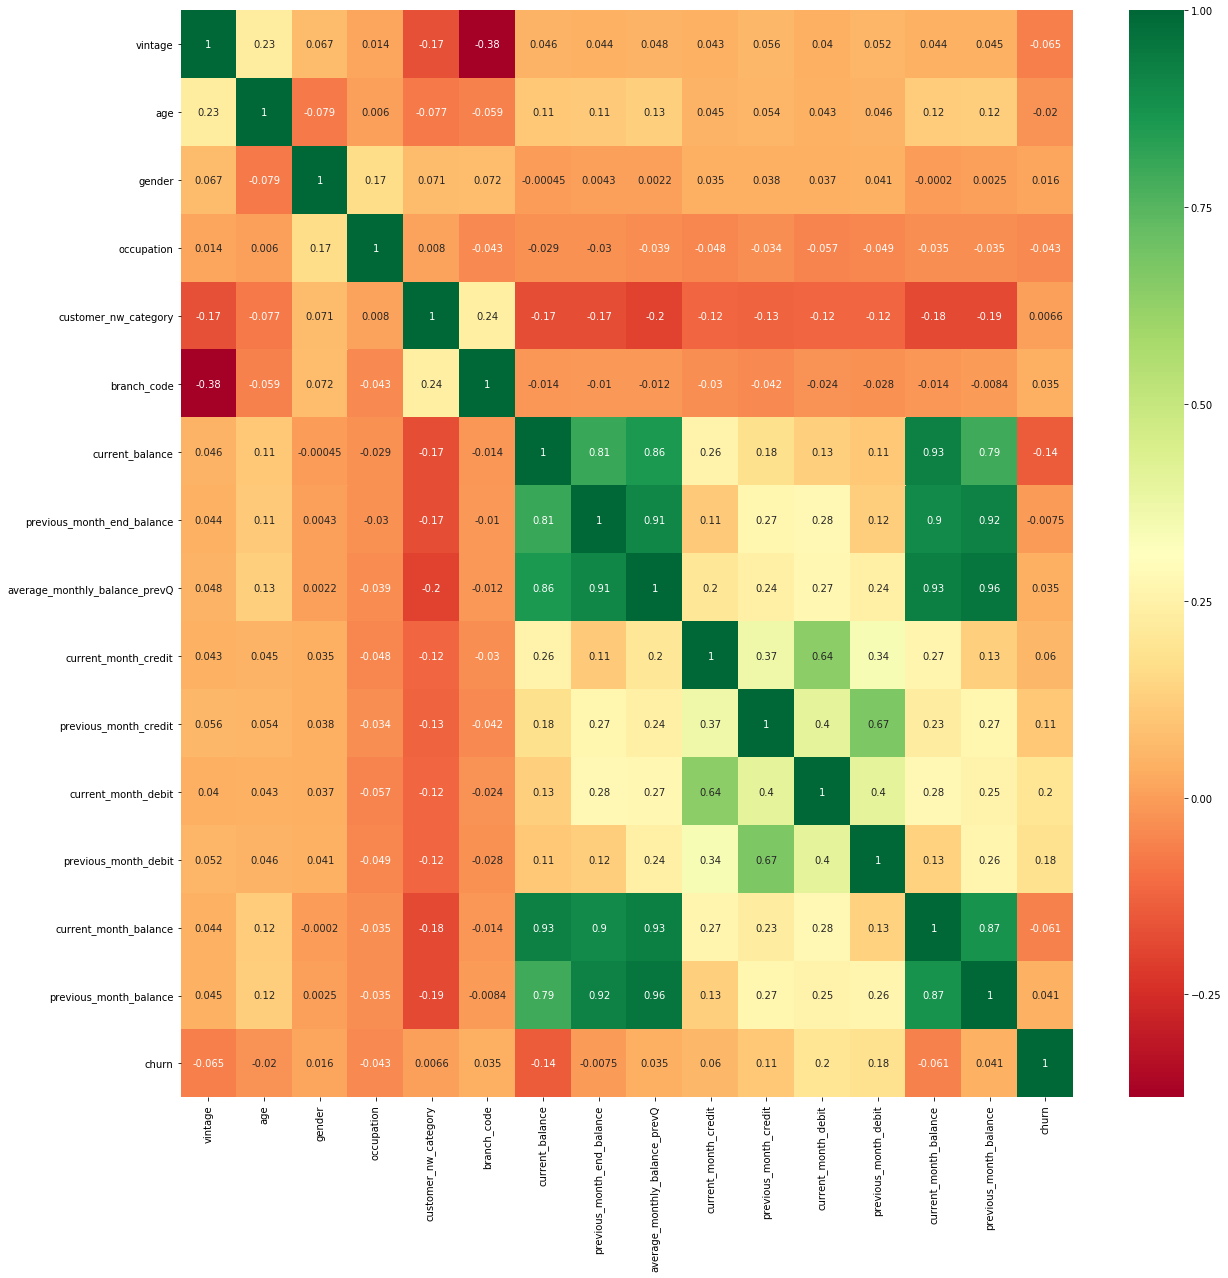

In [77]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [78]:
# Final Feature to select are
#In the heat map the values greater than 0.2 and in the correlation the higher value the better

In [79]:
y1 = ['current_month_debit','current_balance','current_month_balance','previous_month_end_balance','previous_month_debit','average_monthly_balance_prevQ'
                 ,'occupation','average_monthly_balance_prevQ2']

In [80]:
df_y = df[y1]
y1 = df.churn

# Implementing KNN

In [81]:
#importing required libraries

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [82]:
#Data Preprocessing will be done with the help of following script lines

X = df.iloc[:, :-1].values
y = df.iloc[:, 19].values

In [83]:
#we will divide the data into train and test split. Following code will split the dataset into 80% training data and 20% of testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [84]:
#data scaling will be done as follows

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
#train the model with the help of KNeighborsClassifier class of sklearn as follows

classifier = KNN(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [86]:
#At last we need to make prediction. It can be done with the help of following scrip

y_pred = classifier.predict(X_test)

In [87]:
#print the results as follow

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[4628   50]
 [ 893  106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4678
           1       0.68      0.11      0.18       999

    accuracy                           0.83      5677
   macro avg       0.76      0.55      0.55      5677
weighted avg       0.81      0.83      0.78      5677

Accuracy: 0.8338911396864541


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Implementing Ridge Classifier

In [100]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [101]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [102]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)


0.8260295089187404

In [103]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)


0.8303681521930597

# Implementing Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9030609997797842

In [92]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8611942927602607

### we have acheived an accuracy of 86% using random forest classifier

# Improving the Model

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

forest = RandomForestClassifier()

clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [95]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [96]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.8667817630892819